<a href="https://colab.research.google.com/github/annaelyoliveira/Projetos_com_biblioteca_Pandas/blob/main/Projeto_3_%7C_An%C3%A1lise_Explorat%C3%B3ria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pandas

import pandas as pd

In [ ]:
df = pd.read_csv('/content/Base_de_dados/funcionarios.csv')

df

,Unnamed: 0,Nome,Idade,Salário,Região,Departamento
0,0,Ana,25,2500,Sul,RH
1,1,Bruno,32,3200,Sudeste,Vendas
2,2,Carlos,29,3000,Nordeste,TI
3,3,Daniela,41,4100,Norte,TI
4,4,Eduardo,22,2200,Sul,RH
5,5,Fernanda,34,3400,Sudeste,Vendas
6,6,Gabriel,26,2600,Norte,RH
7,7,Helena,28,2800,Nordeste,TI


# Estatísticas descritivas

In [ ]:
#1. Calculando a média, a mediana, a variância e o desvio padrão das idades

media = df['Idade'].mean()
print(f'Média das idades: {media} \n--------------------------')

mediana = df['Idade'].median()
print(f'Mediana das idades: {mediana} \n--------------------------')

moda = df['Idade'].mode()
print(f'Moda das idades: {moda.values} \n--------------------------')


Média das idades: 29.625 
--------------------------
Mediana das idades: 28.5 
--------------------------
Moda das idades: [22 25 26 28 29 32 34 41] 
--------------------------


In [ ]:
# 2. Calculando a soma, a média e o percentil 75% dos salários

soma_salarios = df['Salário'].sum()
print(f'Soma dos salários: {soma_salarios} \n--------------------------')

media_salarios = df['Salário'].mean()
print(f'Média dos salários: {media_salarios} \n--------------------------')

percentil = df['Salário'].quantile(0.75)
print(f'75% dos salários: {percentil} \n--------------------------')


Soma dos salários: 23800 
--------------------------
Média dos salários: 2975.0 
--------------------------
75% dos salários: 3250.0 
--------------------------


In [ ]:
# 3. Usando o método .describe() para obter um resumo estatístico do DataFrame.

resumo = df.describe()
print(resumo)

       Unnamed: 0      Idade      Salário
count     8.00000   8.000000     8.000000
mean      3.50000  29.625000  2975.000000
std       2.44949   5.974649   597.016391
min       0.00000  22.000000  2200.000000
25%       1.75000  25.750000  2575.000000
50%       3.50000  28.500000  2900.000000
75%       5.25000  32.500000  3250.000000
max       7.00000  41.000000  4100.000000


# Análise por grupo

In [ ]:
# 4. Calculando a média do salário por região

media_salario_regiao = df.groupby('Região')['Salário'].mean()
media_salario_regiao

,Salário
Região,
Nordeste,2900.0
Norte,3350.0
Sudeste,3300.0
Sul,2350.0


In [ ]:
# 5. Encontrando a soma dos salários por departamento

soma_salario_dep = df.groupby('Departamento')['Salário'].sum()
soma_salario_dep

,Salário
Departamento,
RH,7300
TI,9900
Vendas,6600


In [ ]:
# 6. Identificando o departamento com o maior salário médio

media_salario_departamento = df.groupby('Departamento')['Salário'].mean()

departamento_maior_salario = media_salario_departamento.idxmax()
salario_maior_departamento = media_salario_departamento.max()

print(f'O departamento com o maior salário médio é: {departamento_maior_salario}')
print(f'O salário médio desse departamento é: {salario_maior_departamento:.2f}')

O departamento com o maior salário médio é: TI
O salário médio desse departamento é: 3300.00


In [ ]:
#Calcule a idade média dos funcionários em cada região

resultado = df.groupby('Região')['Idade'].mean()
resultado

,Idade
Região,
Nordeste,28.5
Norte,33.5
Sudeste,33.0
Sul,23.5


# Visualização de Dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

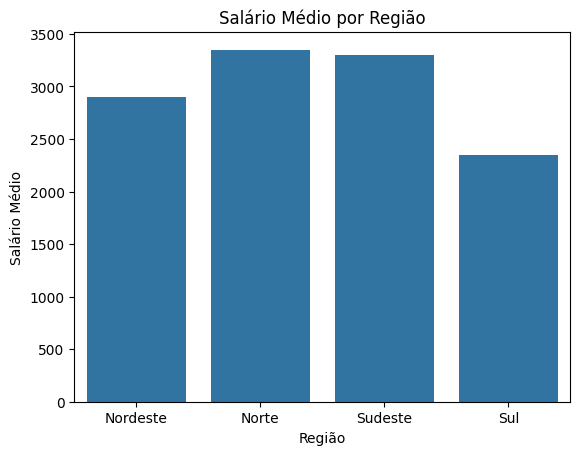

In [ ]:
# 8. Criando um gráfico de barras para visualizar os salários médios por região

# Criando novo dataframe com a Região e Salário Médio
df_medias = df.groupby('Região', as_index=False)['Salário'].mean()
# Renomeando Salário para Salário Médio
df_medias.rename(columns={'Salário': 'Salário Médio'}, inplace=True)


# Criando o gráfico
sns.barplot(x='Região',y='Salário Médio',data = df_medias)
plt.title('Salário Médio por Região')
plt.show()


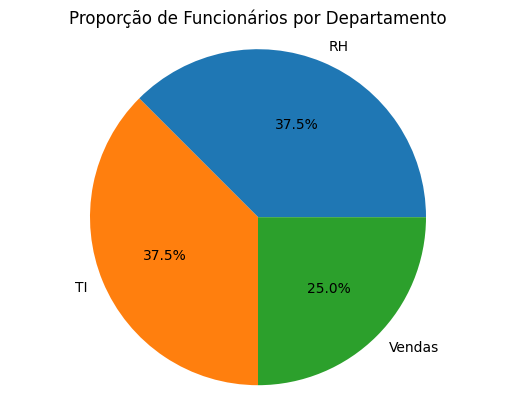

In [ ]:
# 9. Criando um gráfico de pizza para mostrar a proporção de funcionários por departamento

# Contando o número de funcionários por departamento
departamentos = df['Departamento'].value_counts()

# Plotagem
fig1, ax1 = plt.subplots()

# Criando um gráfico de pizza
ax1.pie(departamentos, labels = departamentos.index, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Proporção de Funcionários por Departamento')
plt.show()


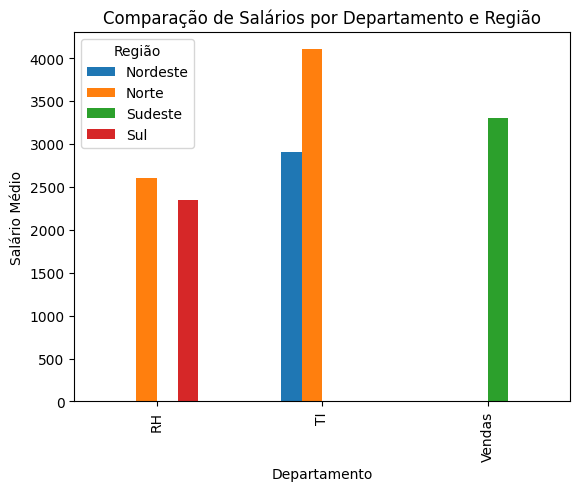

In [ ]:
# 10.Criando um gráfico de barras para comparar os salários por departamento e por região

# Agrupando os dados por Departamento e Região, e calculando a média de salários
salarios_por_departamento_regiao = df.groupby(['Departamento', 'Região'])['Salário'].mean().unstack()

# Criando o gráfico de barras
salarios_por_departamento_regiao.plot(kind='bar')

# Adicionando título e rótulos
plt.title('Comparação de Salários por Departamento e Região')
plt.xlabel('Departamento')
plt.ylabel('Salário Médio')


plt.show()

<Axes: title={'center': 'Relação entre Idade e Salário'}, xlabel='Idade', ylabel='Salário'>

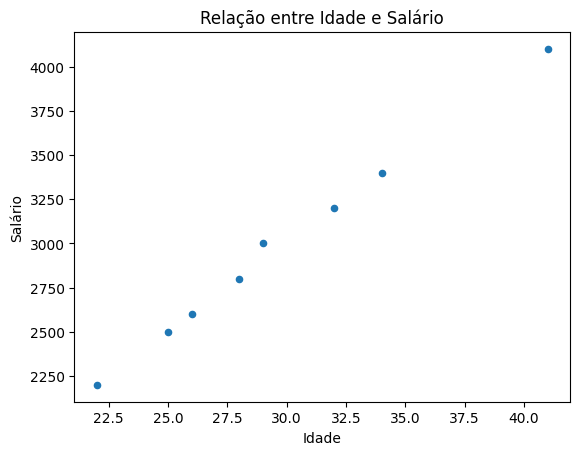

In [ ]:
# 11.Criando um gráfico de dispersão para visualizar a relação entre idade e salário

df.plot(x='Idade', y='Salário', kind='scatter', title='Relação entre Idade e Salário')


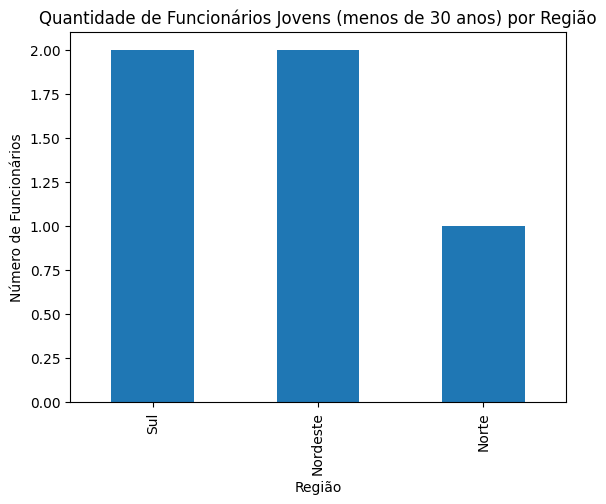

In [ ]:
# 12.Qual região tem a maior concentração de funcionários jovens, com idade menor que 30 anos. (Combine as estatísticas descritivas e os gráficos)

# Contando a quantidade de funcionários jovens (< 30) por região
contagem_por_regiao = df[df['Idade'] < 30]['Região'].value_counts()

# Gráfico de barras para comparar a quantidade de funcionários jovens por região
contagem_por_regiao.plot(kind='bar')
plt.title('Quantidade de Funcionários Jovens (menos de 30 anos) por Região')
plt.xlabel('Região')
plt.ylabel('Número de Funcionários')
plt.show()
